### Imports and Dataframe Construction


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import display, clear_output, Markdown, Latex, HTML
from ipywidgets import widgets, interact
import os

filename = 'stats-data.csv'
dataset = pd.read_csv('datasets/' + filename)

### District vs Assay Boxplot


/tmp/ipykernel_36147/3517711119.py:34: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(left=0.1, right=0.8, top=0.7,


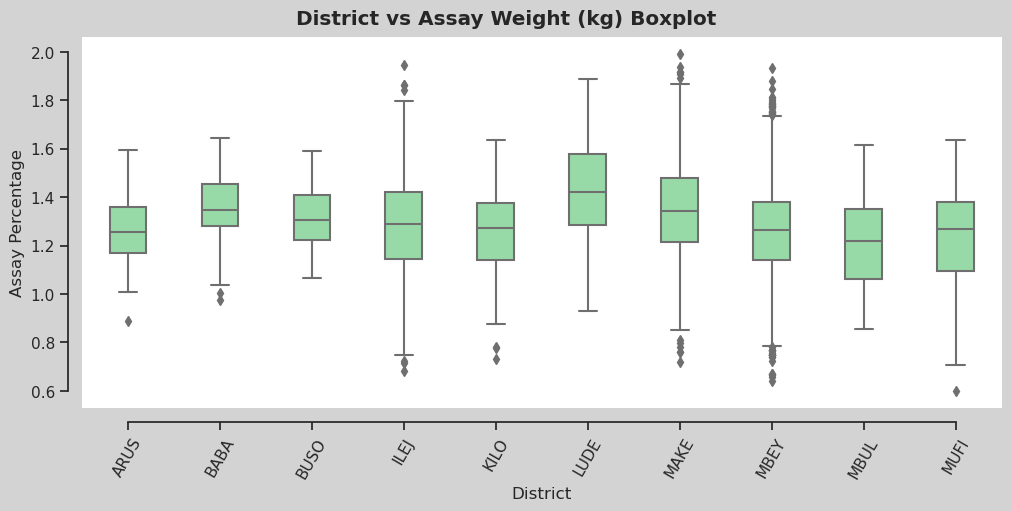

,sum_sq,df,F,PR(>F)
Group,7.877506,9.0,26.549813,7.691780e-46
Residual,341.509336,10359.0,NaN,NaN


In [39]:
# generate ANOVA from selection
selected_districts = ['ARUS', 'BABA', 'BUSO', 'ILEJ',
                      'KILO', 'LUDE', 'MAKE', 'MBEY', 'MBUL', 'MUFI']

df = dataset[dataset['district'].isin(
    selected_districts)]


final_dataset = pd.DataFrame({
    'Value': df['dry_pct']*100,
    'Group': df['district']
})

model = ols('Value ~ Group', data=final_dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
sns.set_theme(style="ticks", palette="pastel")

fig, ax = plt.subplots(figsize=(10, 5), facecolor='white',
                       layout='constrained')
fig.suptitle('District vs Assay Weight (kg) Boxplot',
             fontweight='bold', fontfamily='sans',)
# ax.set_title('Axes', loc='left', fontstyle='oblique', fontsize='medium')

sns.boxplot(x='Group', y='Value',
            palette=["g"],
            data=final_dataset,
            width=0.4,
            ax=ax)
sns.despine(offset=10, trim=True)
# plt.title('District vs Assay Weight (kg) Boxplot')
plt.xlabel('District')
plt.xticks(rotation=60)
plt.ylabel('Assay Percentage')
plt.subplots_adjust(left=0.1, right=0.8, top=0.7,
                    bottom=0.1, wspace=0.3, hspace=0.4)
plt.show()

display(anova_table)